# Exercise 3: Data-Driven Computing Architectures
In this exercise, we will work with Delta tables and the Medallion Architecture. You can gain 15 points, which will be awarded based on how effectively you implement the Bronze, Silver, and Gold layers, the quality of your data transformations and analysis, and how well your visualizations communicate insights. A well-designed pipeline should also allow new files to be uploaded and processed smoothly without requiring major modifications.

**Make sure to include clear explanations of what you did and why throughout your report and visualizations. Grading will also consider how well you justify your choices, so do not just present results but explain your reasoning.**

Useful links:
- https://docs.delta.io/latest/index.html
- https://delta.io/blog/delta-lake-medallion-architecture/

## Scenario

You're a Data Engineer at a manufacturing company that produces industrial components. The factory runs 10 specialized machines, producing drill bits, gears, shafts, conveyor belts, turbine parts, robot components, stamped metal, polished surfaces, laser-cut materials, and 3D-printed prototypes.

Each machine is equipped with sensors to track performance, while production logs record output and defects, and maintenance records document repairs. A team of production operators manages manufacturing, while maintenance operators handle scheduled and emergency repairs.

Recently, management has raised concerns about machine efficiency, defect rates, and maintenance costs, and they want continuous data-driven insights to improve operations. You have been given raw data from three sources:  

- **Sensor Data:** Real-time readings from industrial machines.
- **Production Logs:** Daily records of production output and defects.
- **Maintenance Records:** Logs of scheduled and emergency maintenance events.


---

## Your Assignment
Your task is to build a Medallion Architecture pipeline using Delta Lake to clean, structure, and analyze this data.
1. **Ingest the raw data** into **Bronze Layer** Delta tables.  
2. **Clean and standardize the data** in the **Silver Layer**.  
3. **Aggregate and generate business insights** in the **Gold Layer**.  
4. **Visualize key metrics** to make informed decisions, using for example Matplotlib or Seaborn.

---

## Data Description
The csv files are available in the `/shared` folder in Noppe.
## **1. Sensor Data**  
Captures real-time sensor readings from machines, tracking temperature, vibration, power consumption, and operational status.

### **Key Fields:**  
- `sensor_id`: Unique identifier for the sensor.  
- `machine`: Name of the machine.
- `time_stamp`: Timestamp of the sensor reading.  
- `temp C`: Temperature reading (°C).  
- `vibration_lvl`: Vibration level reading.  
- `power_kW`: Power consumption (kW).  
- `def_ct`: Number of defective sensor readings.  
- `status_flag`: Operational status (e.g., "Running", "Stopped").  
- `noise_val`: Random noise factor in the data.  
- `extra_param`: Additional machine-related parameter.  

---

## **2. Production Logs**  
Tracks machine output, defect rates, and operator activity. Machines in poor condition tend to produce more defects.

### **Key Fields:**  
- `log_id`: Unique identifier for the production log.  
- `product_type`: Type of product produced.  
- `units_produced`: Number of units produced.  
- `defective_units`: Number of defective units.  
- `time_stamp`: Timestamp of production record.  
- `machine`: Machine responsible for production.  
- `operator_id`: Identifier of the operator overseeing production.  
- `remarks`: Additional notes about the production process (e.g., quality concerns, machine adjustments).  
- `batch_info`: Batch identifier for tracking specific production runs.  

---

## **3. Maintenance Records**  
Logs maintenance activities, including scheduled upkeep, emergency repairs, and associated costs. Machines in poor condition require more frequent emergency maintenance.

### **Key Fields:**  
- `maintenance_id`: Unique identifier for the maintenance event.  
- `machine`: Machine undergoing maintenance.  
- `maintenance_date`: Timestamp of maintenance event.  
- `maintenance_type`: Type of maintenance (Scheduled, Unscheduled, Emergency).  
- `duration_minutes`: Length of the maintenance event.  
- `cost`: Cost of the maintenance.  
- `operator`: Identifier of the maintenance operator performing the task.  
- `notes`: Description of the maintenance issue or action taken.  

---

## **4. Operator Dimension Table (Predefined Silver Table)**  
A reference table with details about production and maintenance operators.

### **Key Fields:**  
- `operator_id`: Unique identifier for the operator.  
- `operator_name`: Full name of the operator.  
- `operator_type`: "Production" or "Maintenance".  
 

---

## Medallion Architecture Implementation

### **1. Bronze Layer – Raw Data Storage** (2p)
- Ingest raw data as-is into Delta tables.
- No transformations at this stage.

### **2. Silver Layer – Cleaning & Standardization** (3p) 

**For example:**
- Convert columns into a proper format.  
- Rename columns for consistency, for example (`time_stamp` → `timestamp`).  
- Remove duplicate records.


### **3. Gold Layer – Business Insights** (4p)
**For example:**
- Aggregate sensor, production, and maintenance data to create daily machine performance metrics.  
- Join tables to uncover correlations between sensor readings, defects, and maintenance events.  
- Visualize the tables and metrics.
---

## Example Visualizations:

### **Daily Sensor Metrics**
- Average temperature, vibration, and power consumption per machine.  
- Number of downtime events (`status_flag = "Stopped"`).  

### **Daily Production Metrics**
- Total units produced and defective units per machine.  
- Production yield: (total_units_produced - defective_units) / total_units_produced


### **Daily Maintenance Metrics**
- Number of maintenance events per machine.  
- Total maintenance costs per machine.  

### **Advanced Insights**
- Correlation analysis between high vibration levels and production defects.  
- Identify the most frequent operator per machine per day.  
- Estimate energy consumption trends over time.  

**You are encouraged to explore and define your own insights.**

---

## Example Directory Structure

```plaintext
data_lake/
├── bronze/
│   ├── sensor_data_bronze/          # Raw Sensor Data (Delta table)
│   ├── production_data_bronze/      # Raw Production Data (Delta table)
│   └── maintenance_data_bronze/     # Raw Maintenance Data (Delta table)
├── silver/
│   ├── sensor_data_silver/          # Cleaned Sensor Data (Delta table)
│   ├── production_data_silver/      # Cleaned Production Data (Delta table)
│   ├── maintenance_data_silver/     # Cleaned Maintenance Data (Delta table)
│   └── dim_operator_silver/         # Operator Dimension Table (Delta table)
└── gold/
  └── gold_machine_performance/  # Aggregated Machine Performance (Delta table)
```
---

In [1]:
pip install delta-spark==3.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession
from delta import configure_spark_with_delta_pip

# Configure the Spark session with Delta support
builder = SparkSession.builder \
    .appName("Exercise3") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-core_2.12:3.0.0")

# Create the Spark session
spark = configure_spark_with_delta_pip(builder).getOrCreate()

print("Spark session with Delta Lake configured successfully!")
spark


Spark session with Delta Lake configured successfully!


### 1. Bronze Layer

In [18]:
import os

# CSV raw data paths
sensor_path = "../shared/sensor_data.csv"
production_path = "../shared/production_data.csv"
maintenance_path = "../shared/maintenance_data.csv"

# Path for saving Delta tables in bronze
bronze_path = "./data_lake/bronze"

# Ensure the directory exists
os.makedirs(bronze_path, exist_ok=True)

# Load raw data
sensor_df = spark.read.csv(sensor_path, header=True, inferSchema=True) 

# The three datasets will be loaded to the bronze layer at this stage. 
# We are renaming columns to remove spaces in column names because Delta Lake does not allow spaces in column names. 
sensor_df = sensor_df.toDF(*[col.replace(" ", "_") for col in sensor_df.columns])
sensor_df.write.format("delta").mode("overwrite").save(f"{bronze_path}/sensor_data_bronze")

production_df = spark.read.csv(production_path, header=True, inferSchema=True) 
production_df.write.format("delta").mode("overwrite").save(f"{bronze_path}/production_data_bronze")

maintenance_df = spark.read.csv(maintenance_path, header=True, inferSchema=True) 
maintenance_df.write.format("delta").mode("overwrite").save(f"{bronze_path}/maintenance_data_bronze")


print("Bronze layer data ingestion completed!")



Bronze layer data ingestion completed!


### 2. Silver Layer

In [19]:
from pyspark.sql.functions import col
from pyspark.sql.types import TimestampType

# Path for saving Delta tables in silver
silver_path = "./data_lake/silver"

# Ensure the directory exists
os.makedirs(silver_path, exist_ok=True)

operator_path = "../shared/dim_operator.csv"

# We are loading this dataset directly to the silver layer because it was already cleaned and standardized. 
operator_df = spark.read.csv(operator_path, header=True, inferSchema=True)
operator_df.write.format("delta").mode("overwrite").save(f"{silver_path}/operator_dimension_silver")

# Load Bronze Layer Data for cleaning and standardization
# Duplicates are identified and removed separately in the three datasets by checking their respective 'unique identifiers'. 
# The 'time_stamp' column is changed to 'timestamp', and its datatype is converted from string to Timestamp.
# The datatype of all numeric columns is converted to float and integer accordingly because all the columns were 'object' or
# string datatypes.

# All columns referring to a machine name are renamed to 'machine_name' in each of the three datasets to ensure consistency. 
sensor_silver = spark.read.format("delta").load(f"{bronze_path}/sensor_data_bronze") \
    .dropDuplicates(["sensor_id"]) \
    .withColumnRenamed("machine", "machine_name") \
    .withColumnRenamed("time_stamp", "timestamp") \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("temp_C", col("temp_C").cast("float")) \
    .withColumn("power_kW", col("power_kW").cast("float")) \
    .withColumn("vibration_lvl", col("vibration_lvl").cast("float")) \
    .withColumn("noise_val", col("noise_val").cast("float")) \
    .withColumn("def_ct", col("def_ct").cast("int")) \
    .withColumn("extra_param", col("def_ct").cast("int")) \

sensor_silver.write.format("delta").mode("overwrite").save(f"{silver_path}/sensor_data_silver")

# Similar cleaning and standardization have been done in this dataset as well.
# We dropped the nan values because they were small in number, and just wanted to show what kind of task can be done in the Silver layer. 
production_silver = spark.read.format("delta").load(f"{bronze_path}/production_data_bronze") \
    .dropDuplicates(["log_id"]) \
    .withColumnRenamed("MachineName", "machine_name") \
    .withColumnRenamed("time_stamp", "timestamp") \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("units_produced", col("units_produced").cast("int")) \
    .withColumn("defective_units", col("defective_units").cast("int")) \
    .na.drop()

production_silver.write.format("delta").mode("overwrite").save(f"{silver_path}/production_data_silver")

# The 'maintenance_data' column is renamed 'timestamp' for consistency reasons. 
# Two column datatypes were also cast. 
maintenance_silver = spark.read.format("delta").load(f"{bronze_path}/maintenance_data_bronze") \
    .dropDuplicates(["maintenance_id"]) \
    .withColumnRenamed("machine", "machine_name") \
    .withColumnRenamed("maintenance_date", "timestamp") \
    .withColumn("timestamp", col("timestamp").cast(TimestampType())) \
    .withColumn("duration_minutes", col("duration_minutes").cast("int")) \
    .withColumn("cost", col("cost").cast("float")) \

maintenance_silver.write.format("delta").mode("overwrite").save(f"{silver_path}/maintenance_data_silver")

print("Silver layer processing complete!")



Silver layer processing complete!


### 3. Gold Layer

In [21]:
# Load Silver Layer tables
sensor_df = spark.read.format("delta").load(f"{silver_path}/sensor_data_silver")
production_df = spark.read.format("delta").load(f"{silver_path}/production_data_silver")
maintenance_df = spark.read.format("delta").load(f"{silver_path}/maintenance_data_silver")
operator_df = spark.read.format("delta").load(f"{silver_path}/operator_dimension_silver")


In [22]:
from delta import *
from pyspark.sql.functions import col, avg, count, sum, when, expr, lag, round, corr, desc, rank
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Daily Sensor Metrics

In [23]:
# Path for saving Delta tables in gold layer
gold_path = "./data_lake/gold"

# Ensure the directory exists
os.makedirs(gold_path, exist_ok=True)


daily_sensor_metrics = sensor_df \
    .groupBy("machine_name", expr("date(timestamp)").alias("date")) \
    .agg(
        round(avg("temp_C"), 2).alias("avg_temp_C"),
        round(avg("vibration_lvl"), 2).alias("avg_vibration_lvl"),
        round(avg("power_kW"), 2).alias("avg_power_kW"),
        count(when(col("status_flag") == "Stopped", True)).alias("downtime_count")
    ) \
    .orderBy("machine_name", "date")

daily_sensor_metrics.show()

daily_sensor_metrics.write.format("delta").mode("overwrite").save(f"{gold_path}/gold_machine_performance")

+---------------+----------+----------+-----------------+------------+--------------+
|   machine_name|      date|avg_temp_C|avg_vibration_lvl|avg_power_kW|downtime_count|
+---------------+----------+----------+-----------------+------------+--------------+
| 3DPrinter-1000|2024-10-01|     41.61|             1.25|       18.57|             0|
| 3DPrinter-1000|2024-10-06|     49.48|             2.76|       19.12|             1|
|   CNC-Mill-200|2024-10-01|      48.0|              0.9|       19.25|             1|
|   Conveyor-400|2024-10-01|     52.82|             1.81|       18.92|             1|
| DrillPress-100|2024-10-01|      48.1|             1.03|        20.9|             1|
|    Grinder-800|2024-10-01|      48.2|             1.62|        19.2|             0|
|LaserCutter-900|2024-10-01|     44.25|             0.76|       15.99|             1|
|      Lathe-300|2024-10-01|     45.23|             1.07|       22.06|             1|
|      Press-700|2024-10-01|     50.61|              1

#### Daily Production Metrics

In [24]:
daily_production_metrics = production_df \
    .groupBy("machine_name", expr("date(timestamp)").alias("date")) \
    .agg(
        sum("units_produced").alias("total_units_produced"),
        sum("defective_units").alias("total_defective_units")
    ) \
    .withColumn("production_yield", 
                round((col("total_units_produced") - col("total_defective_units")) / col("total_units_produced"), 3)) \
    .orderBy("machine_name", "date")

daily_production_metrics.show()


daily_production_metrics.write.format("delta").mode("overwrite").save(f"{gold_path}/gold_production_performance")


+--------------+----------+--------------------+---------------------+----------------+
|  machine_name|      date|total_units_produced|total_defective_units|production_yield|
+--------------+----------+--------------------+---------------------+----------------+
|3DPrinter-1000|2024-10-01|                 140|                    6|           0.957|
|3DPrinter-1000|2024-10-02|                 255|                   37|           0.855|
|3DPrinter-1000|2024-10-03|                 114|                   15|           0.868|
|3DPrinter-1000|2024-10-04|                 160|                   22|           0.863|
|3DPrinter-1000|2024-10-05|                 165|                   26|           0.842|
|3DPrinter-1000|2024-10-06|                 109|                   15|           0.862|
|3DPrinter-1000|2024-10-07|                  86|                   12|            0.86|
|3DPrinter-1000|2024-10-08|                 209|                   30|           0.856|
|3DPrinter-1000|2024-10-09|     

### Daily Maintenance Metrics

In [25]:
daily_maintenance_metrics = maintenance_df \
    .groupBy("machine_name", expr("date(timestamp)").alias("date")) \
    .agg(
        count("maintenance_id").alias("maintenance_count"),
        round(sum("cost"), 2).alias("total_maintenance_cost")
    ) \
    .orderBy("machine_name", "date")

daily_maintenance_metrics.show()

daily_maintenance_metrics.write.format("delta").mode("overwrite").save(f"{gold_path}/gold_maintenance_performance")

+--------------+----------+-----------------+----------------------+
|  machine_name|      date|maintenance_count|total_maintenance_cost|
+--------------+----------+-----------------+----------------------+
|3DPrinter-1000|2024-10-06|                1|                291.93|
|3DPrinter-1000|2024-10-12|                1|               1443.28|
|3DPrinter-1000|2024-10-16|                1|               1208.08|
|3DPrinter-1000|2024-10-17|                1|                1108.5|
|3DPrinter-1000|2024-10-18|                1|                451.14|
|3DPrinter-1000|2024-11-11|                1|                939.65|
|3DPrinter-1000|2024-11-12|                1|                 890.4|
|3DPrinter-1000|2024-11-18|                1|                240.48|
|3DPrinter-1000|2024-11-21|                1|                216.93|
|3DPrinter-1000|2024-11-22|                1|                367.02|
|3DPrinter-1000|2024-11-24|                1|                 364.4|
|3DPrinter-1000|2024-11-25|       

**Daily Average Temperature (left) and Average Vibration (right) per Machine**

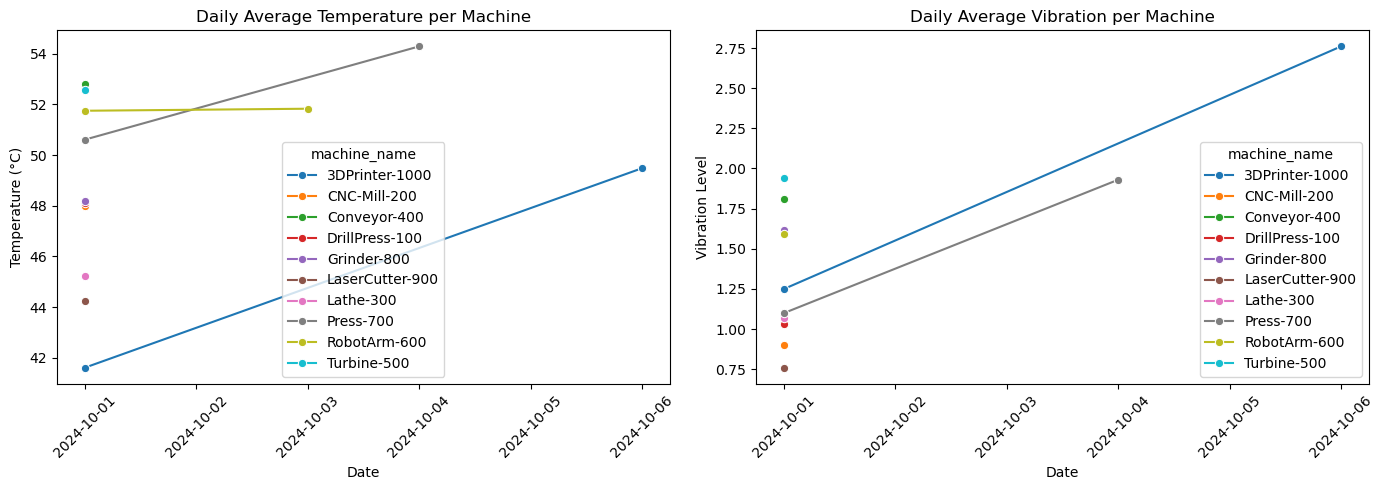

In [26]:
# Read the Delta file as a DataFrame
daily_sensor = spark.read.format("delta").load(f"{gold_path}/gold_machine_performance")
df_sensor = daily_sensor.toPandas()

# Create a 1x2 subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Seaborn lineplot for the first subplot (temperature)
sns.lineplot(data=df_sensor, x="date", y="avg_temp_C", hue="machine_name", marker="o", ax=ax[0])

# Set titles and labels for the first subplot
ax[0].set_title("Daily Average Temperature per Machine")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Temperature (°C)")
ax[0].tick_params(axis='x', rotation=45)

# Seaborn lineplot for the second subplot (vibration)
sns.lineplot(data=df_sensor, x="date", y="avg_vibration_lvl", hue="machine_name", marker="o", ax=ax[1])

# Set titles and labels for the second subplot
ax[1].set_title("Daily Average Vibration per Machine")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Vibration Level")
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


**Daily Power Comsumption Temperature per Machine**

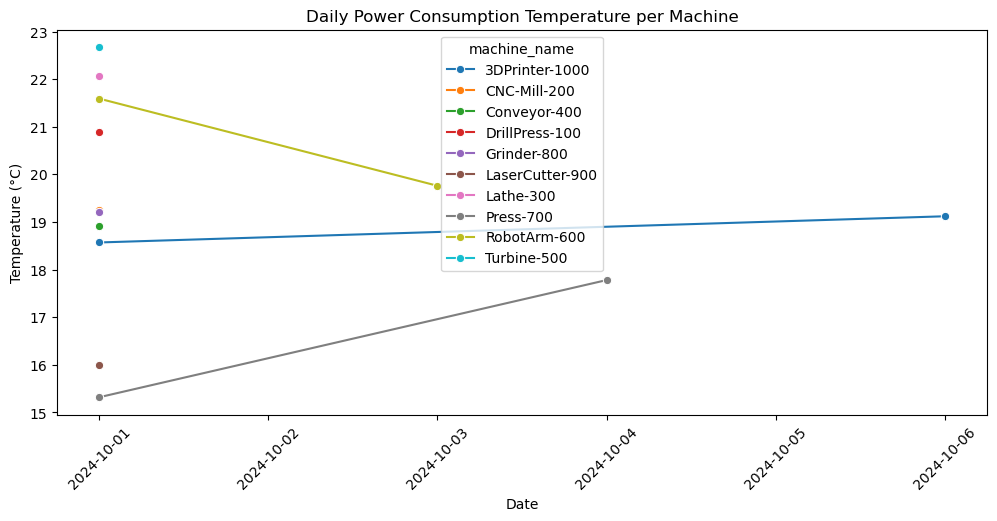

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sensor, x="date", y="avg_power_kW", hue="machine_name", marker="o")
plt.title("Daily Power Consumption Temperature per Machine")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()

**Production Yield vs. Downtime Events**

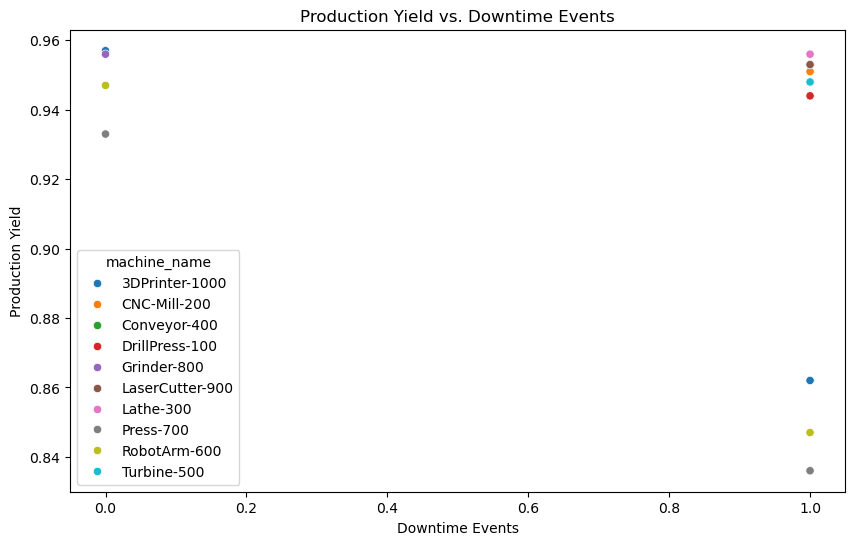

In [28]:
# Load data as to PySpark DataFrame and convert to Pandas dataframe
daily_production = spark.read.format("delta").load(f"{gold_path}/gold_production_performance")
df_production = daily_production.toPandas()

# Merge production and sensor metrics
df_merged = pd.merge(df_production, df_sensor, on=["machine_name", "date"])

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x="downtime_count", y="production_yield", hue="machine_name", palette="tab10")
plt.xlabel("Downtime Events")
plt.ylabel("Production Yield")
plt.title("Production Yield vs. Downtime Events")
plt.show()


**Total units produced and defective units per machine.** \
We drew only one machine to show how it works, but we could have looped through all the machines. Moreover, we couldn't draw sparsed graph with all the data to be showed in the target graph.  

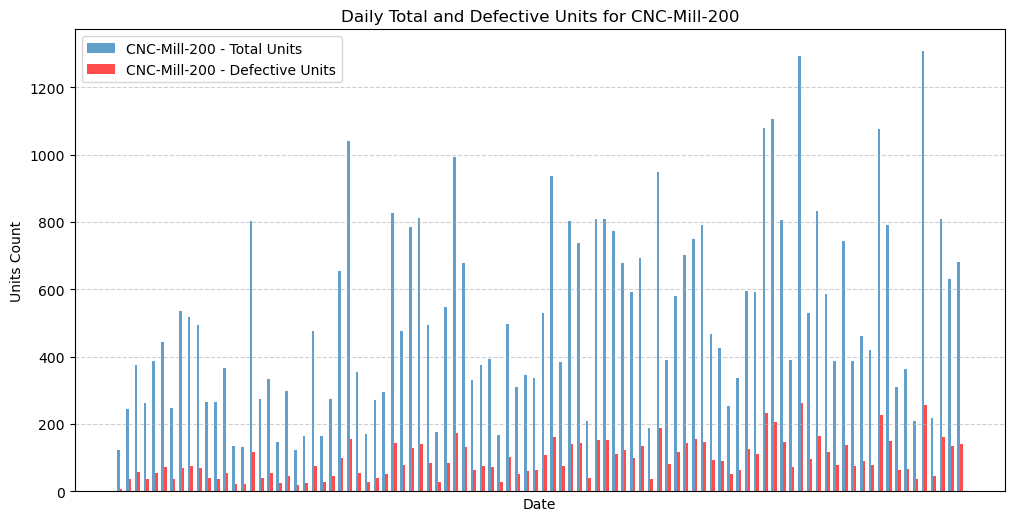

In [44]:
# Ensure the date column is in datetime format
df_production["date"] = pd.to_datetime(df_production["date"])

# Find the top most machine by total_units_produced
top_machines = df_production.groupby("machine_name")["total_units_produced"].sum().nlargest(1).index


# Ensure the date column is in datetime format
df_production["date"] = pd.to_datetime(df_production["date"])

# Find the top machine by total_units_produced
top_machine = df_production.groupby("machine_name")["total_units_produced"].sum().idxmax()

# Filter the dataset for only the top machine
df_top_machine = df_production[df_production["machine_name"] == top_machine]

# Pivot Data for better plotting
pivot_df = df_top_machine.pivot(index="date", columns="machine_name", values=["total_units_produced", "total_defective_units"])

plt.figure(figsize=(12, 6))

# Generate x-axis positions
x = np.arange(len(pivot_df))
width = 0.3  

# Plot bars for total and defective units
plt.bar(x - width/2, pivot_df[("total_units_produced", top_machine)], width, label=f"{top_machine} - Total Units", alpha=0.7)
plt.bar(x + width/2, pivot_df[("total_defective_units", top_machine)], width, label=f"{top_machine} - Defective Units", alpha=0.7, color="red")
plt.xlabel("Date")
plt.ylabel("Units Count")
plt.title(f"Daily Total and Defective Units for {top_machine}")

# Remove x-axis labels
# This is removed because the graph had dense x-axis values 
plt.xticks([])

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**We choose to show the total units produced and defective units per machine in a table format**

In [31]:
df_production["date"] = pd.to_datetime(df_production["date"])

# Compute total units produced and defective units per machine
machine_stats = df_production.groupby("machine_name")[["total_units_produced", "total_defective_units"]].sum()

print(machine_stats)

                 total_units_produced  total_defective_units
machine_name                                                
3DPrinter-1000                  18824                   3172
CNC-Mill-200                    49566                   9019
Conveyor-400                    36131                   6360
DrillPress-100                  45614                   8326
Grinder-800                     43275                   7861
LaserCutter-900                 32106                   5690
Lathe-300                       39067                   7243
N/A                                79                     17
Press-700                       38763                   7356
RobotArm-600                    41675                   7760
Turbine-500                     27310                   5058
unknown                           477                     67



**Production Yield per Machine**

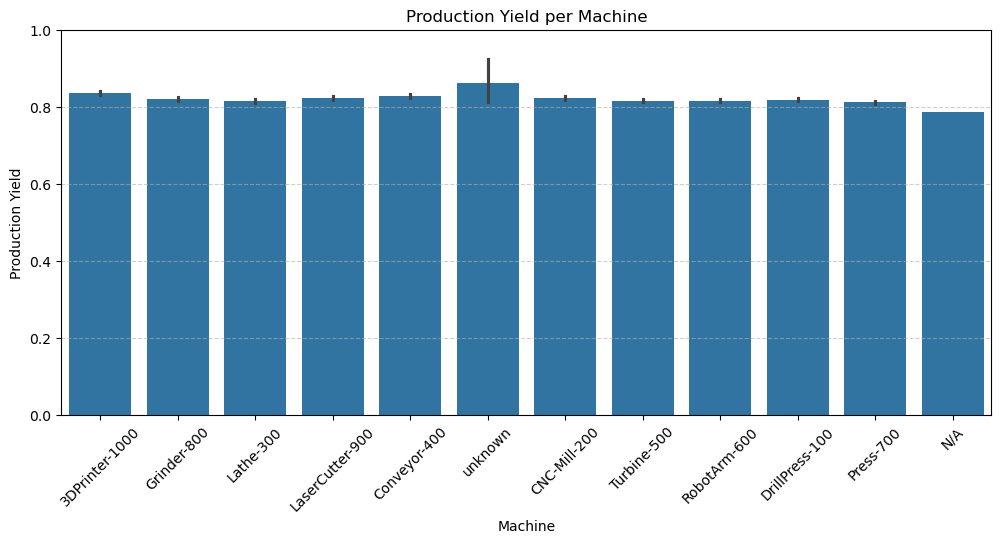

In [35]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_production, x="machine_name", y="production_yield")

plt.xlabel("Machine")
plt.ylabel("Production Yield")
plt.title("Production Yield per Machine")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Yield is a ratio (0 to 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**Number of maintenance events and total maintenance costs per machine**

In [36]:
# Calculate the number of maintenance events per machine
# Calculate the overall number of maintenance events and total costs, not daily. 

daily_maintenance = spark.read.format("delta").load(f"{gold_path}/gold_maintenance_performance")

maintenance_event_count = daily_maintenance \
    .groupBy("machine_name") \
    .agg(count("maintenance_count").alias("number_of_maintenance_events"))

# Calculate the total maintenance costs per machine
total_maintenance_cost = daily_maintenance \
    .groupBy("machine_name") \
    .agg(round(sum("total_maintenance_cost"), 2).alias("total_maintenance_cost"))

# Join the two results on 'machine_name'
maintenance_summary = maintenance_event_count \
    .join(total_maintenance_cost, on="machine_name", how="inner")

# Show the result
maintenance_summary.show()


+---------------+----------------------------+----------------------+
|   machine_name|number_of_maintenance_events|total_maintenance_cost|
+---------------+----------------------------+----------------------+
|   Conveyor-400|                          21|              14451.41|
|LaserCutter-900|                          25|              14608.14|
|    Grinder-800|                          28|              18149.09|
|   CNC-Mill-200|                          23|              10980.87|
|   RobotArm-600|                          28|              18843.56|
|      Lathe-300|                          15|               5471.71|
| DrillPress-100|                          26|              10443.74|
|      Press-700|                          23|              14828.58|
| 3DPrinter-1000|                          32|              17916.54|
|    Turbine-500|                          25|              14556.66|
+---------------+----------------------------+----------------------+



**Number of maintenance events (left) and total maintenance costs (right) per machine**

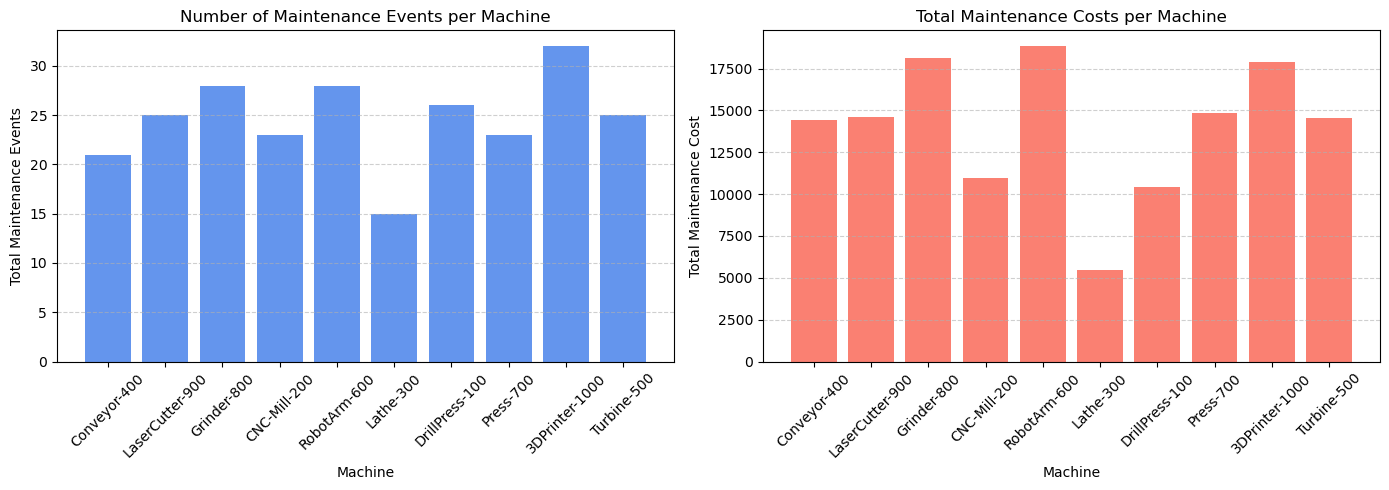

In [37]:
df_maintenance = maintenance_summary.toPandas()

# Set figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart: Maintenance Events
ax[0].bar(df_maintenance["machine_name"], df_maintenance["number_of_maintenance_events"], color="cornflowerblue")
ax[0].set_xlabel("Machine")
ax[0].set_ylabel("Total Maintenance Events")
ax[0].set_title("Number of Maintenance Events per Machine")
ax[0].grid(axis="y", linestyle="--", alpha=0.6)

ax[0].tick_params(axis='x', rotation=45)

# Bar Chart: Maintenance Costs
ax[1].bar(df_maintenance["machine_name"], df_maintenance["total_maintenance_cost"], color="salmon")
ax[1].set_xlabel("Machine")
ax[1].set_ylabel("Total Maintenance Cost")
ax[1].set_title("Total Maintenance Costs per Machine")
ax[1].grid(axis="y", linestyle="--", alpha=0.6)

ax[1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


**Correlation Between Vibration and Defects**

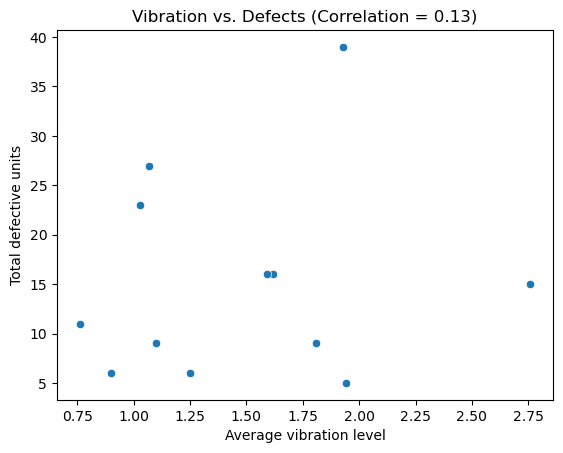

In [38]:
import matplotlib.pyplot as plt

# Join Sensor & Production Data
sensor_prod_corr = daily_sensor.alias("s") \
    .join(daily_production.alias("p"), 
          (col("s.machine_name") == col("p.machine_name")) & 
          (col("s.date") == col("p.date"))) \
    .select("s.avg_vibration_lvl", "p.total_defective_units")

# Convert to Pandas for visualization
corr_df = sensor_prod_corr.toPandas()

# Calculate Correlation
correlation = corr_df["avg_vibration_lvl"].corr(corr_df["total_defective_units"])

sns.scatterplot(x="avg_vibration_lvl", y="total_defective_units", data=corr_df)
plt.title("Vibration vs. Defects (Correlation = {:.2f})".format(correlation))
plt.ylabel("Total defective units")
plt.xlabel("Average vibration level")
plt.show()

**The most frequent operator per machine per day.**

In [43]:
from pyspark.sql.window import Window

# Step 1: Filter out rows with NULL values in machine_name or date
operator_analysis = production_df \
    .join(operator_df, "operator_id", "left") \
    .withColumn("date", expr("date(timestamp)").alias("date")) \
    .filter(F.col("machine_name").isNotNull() & col("date").isNotNull()) \
    .groupBy("machine_name", "date", "operator_name") \
    .agg(F.count("*").alias("activity_count"))

# Step 2: Define window to rank operators by activity count
window = Window.partitionBy("machine_name", "date").orderBy(desc("activity_count"))

# Step 3: Rank the operators and filter the most frequent ones (rank = 1)
top_operators = operator_analysis \
    .withColumn("rank", rank().over(window)) \
    .filter(col("rank") == 1) \
    .select("machine_name", "date", "operator_name", "activity_count") \
    .orderBy (desc("activity_count"))  

# Show the result
top_operators.show()


+--------------+----------+----------------+--------------+
|  machine_name|      date|   operator_name|activity_count|
+--------------+----------+----------------+--------------+
|3DPrinter-1000|2024-11-06| Cristian Santos|             3|
|3DPrinter-1000|2024-12-03|     Noah Rhodes|             3|
|3DPrinter-1000|2024-12-12|    Jamie Arnold|             3|
|  CNC-Mill-200|2024-12-07|  Monica Herrera|             3|
|DrillPress-100|2024-11-10|     Noah Rhodes|             3|
|DrillPress-100|2024-11-12|  Monica Herrera|             3|
|   Grinder-800|2024-10-06| Abigail Shaffer|             3|
|   Grinder-800|2024-11-24| Abigail Shaffer|             3|
|   Grinder-800|2024-11-29|    Lisa Hensley|             3|
|   Grinder-800|2024-12-17| Gabrielle Davis|             3|
|     Lathe-300|2024-11-14| Abigail Shaffer|             3|
|     Press-700|2024-12-30|     Noah Rhodes|             3|
|  RobotArm-600|2024-10-07|      Ryan Munoz|             3|
|   Turbine-500|2024-10-11|    Jamie Arn

## Discussion Questions (6p)

1. **Have we now built a data lakehouse? Why or why not?**  


**Yes,** because data lakehouse combines the best of data lakes and data warehouses. It combines data lake flexibility and scalability with data warehouse ACID transactions and schema enforcement.
 
**Why it's not just a data lake:** \
A pure data lake often lacks the structure and data quality controls of a lakehouse.  The medallion architecture addresses these shortcomings with its three layers and defined processes.  It's not just a repository of raw data; it's an environment for data transformation, cleaning, and serving.

**Why it's not just a data warehouse:** \
A data warehouse typically deals with highly structured data. On the other hand, a lakehouse embraces the variety and volume of data found in a data lake, including semi-structured and unstructured data. It offers more flexibility and scalability than a data warehouse.

Overall, by combining the scalability and flexibility of a data lake with the data management and governance capabilities of a data warehouse, we have indeed built a data lakehouse. 

2. **How does the medallion architecture enhance data quality and governance in this pipeline?**  


By progressively ensuring data quality checks as data moves from the Bronze → Silver → Gold layers, with clear lineage and governance, it enables incremental improvements in data quality from the Bronze to Gold layers, which also leads to early detection of issues in the pipeline. \

#### Data Quality

At the Bronze Layer, raw, unprocessed data from multiple sources is stored. It captures metadata (source, ingestion timestamp, schema evolution) for governance. Quality controls at the Bronze layer include schema validation to ensure the correct format, logging, and lineage tracking for auditability.

At the Silver layer, data undergoes cleaning, validation, and transformation. Moreover, schema enforcement and deduplication enhancements can also be performed at this stage. Quality controls at the Silver layer include handling missing values via imputation, data consistency checks (e.g., renaming columns, correcting data types), and de-duplication to remove redundant data.
    
The Gold layer aggregates enriches and optimizes data for business use. Quality control at this layer includes business logic validation and data completeness checks.

#### Governance: 

**Data Lineage and Auditing:**

 - Layer-to-Layer Traceability: Data flows from bronze → silver → gold, with each step logged for lineage tracking. 
 - Transaction logs and time travel enable auditing historical changes. 

**Compliance:** Supports regulatory requirements (e.g., GDPR) by documenting data origins and transformations. 

**Access Control and Security:** It uses granular permission that restricts access by layer

3. **What challenges might arise when scaling this pipeline from batch-based to real-time streaming data?**  

 **Latency and Processing Speed:** Streaming requires low-latency, near-real-time processing. \
 **Data Quality & Schema Evolution:** Schema evolution (new fields, type changes) occurs in real time and can break pipelines. \
 **Infrastructure and Scalability:** Scalability bottlenecks may arise when handling high-velocity data. \
 **Incremental Updates:** Real-time updates need to be applied incrementally. This requires different data structures and update mechanisms.